##### Dados Titanic
Quais os fatores que fizeram as pessoas mais propensas a sobreviver?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('train.csv')

In [ ]:
data.Sex

In [ ]:
data['SexInt'] = 1
data.SexInt[data.Sex == 'female'] = 0
data.SexInt

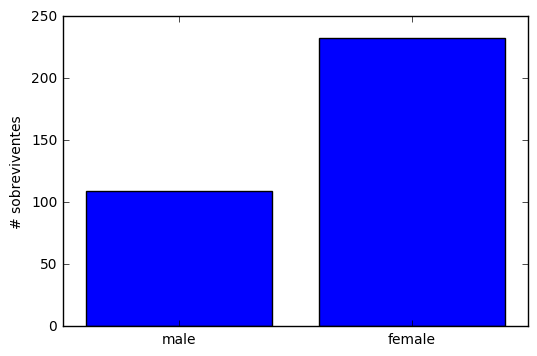

In [28]:
genders = ['male', 'female']
values = [sum(data.Survived[data.Sex == 'male']),
sum(data.Survived[data.Sex == 'female'])]

xs = [i + 0.1 for i, _ in enumerate(genders)]
plt.bar(xs, values)

plt.xticks([i + 0.5 for i, _ in enumerate(genders)], genders)
plt.ylabel('# sobreviventes')

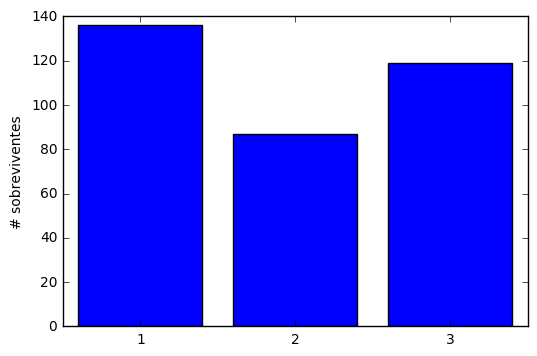

In [32]:
p_class = ['1', '2', '3']
classes = [sum(data.Survived[data.Pclass == 1]),
           sum(data.Survived[data.Pclass == 2]),
          sum(data.Survived[data.Pclass == 3])]

xs = [i + 0.1 for i, _ in enumerate(p_class)]
plt.bar(xs, classes)

plt.xticks([i + 0.5 for i, _ in enumerate(p_class)], p_class)
plt.ylabel('# sobreviventes')

In [33]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'SexInt'],
      dtype='object')

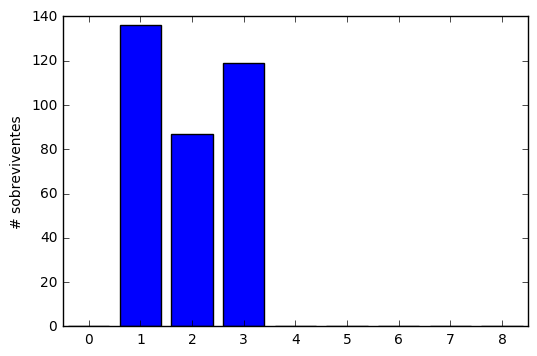

In [39]:
siblings = [str(i) for i in range(max(data.SibSp)+ 1)]
siblings_values = [sum(data.Survived[data.Pclass == int(k)])
                   for k in siblings]

xs = [i + 0.1 for i, _ in enumerate(siblings)]
plt.bar(xs, siblings_values)

plt.xticks([i + 0.5 for i, _ in enumerate(siblings)], siblings)
plt.ylabel('# sobreviventes')

In [64]:
import numpy as np

min_ages = min(data.Age)
max_ages = max(data.Age)
step_ages = max_ages / 10
range_ages = range(0, int(np.ceil(max_ages)), int(step_ages))

ages = [sum(data.Survived[(data.Age > age) & (data.Age < age + int(step_ages) + 1)])
        for age in range_ages]

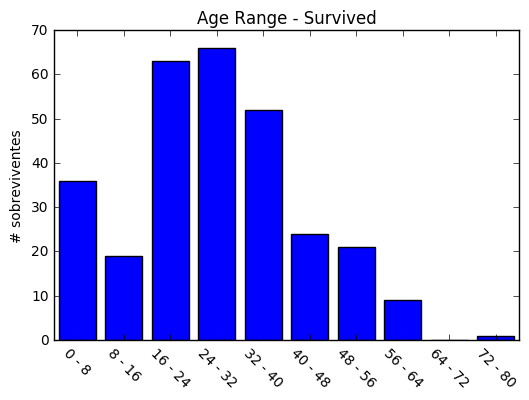

In [66]:
steps = [str(int(i)) + ' - ' + str(int(i) + int(step_ages))
         for i in range_ages]

xs = [i + 0.1 for i, _ in enumerate(ages)]
plt.bar(xs, ages)

plt.xticks([i + 0.5 for i, _ in enumerate(steps)], steps, rotation=-45)
plt.ylabel('# sobreviventes')
plt.title('Age Range - Survived')